In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import MINST data, split it into X ad Y, isolate X1, X2 and X3 from X <br>
where X1 = subdata of X containing 0, X2 = 6, X3 = 9

In [20]:
#load data into memory
data=pd.read_csv("data.csv")
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [21]:
#convert data into matrix
data=np.array(data)
print(f"total shape:{data.shape}")

#dataset has 42000 images, each of resolution 28*28 pixels (784 flattened pixels per image)
#flattening: take a matrix and convert it to a vector
#datasets of images are always flattened
#each image is labelled (the label says which number is rapresented), so we have 785 columns in total
#we're gonna split the data intto a matrix X and a vector Y, where:
#X is of dimension (42000, 784) -> just images
#Y is of dimension (42000, ) -> just label [first column of the 785]

#split data into X and Y
X=data[:,1:].T 
Y=data[:,0]
#isolate X1, X2, X3
i1= (Y==0)
i2= (Y==6)
i3= (Y==9)

X1=X[:, i1]
X2=X[:, i2]
X3=X[:, i3]

Y1=Y[i1]
Y2=Y[i2]
Y3=Y[i3]

#plt.imshow(X1[:,0], (28,28), cmap="grey")
d,N=X.shape
X=np.concatenate((X1,X2,X3), axis=1)
Y=np.concatenate((Y1,Y2,Y3))

total shape:(42000, 785)


In [22]:
X=np.concatenate((X1,X2,X3), axis=1)
Y=np.concatenate((Y1,Y2,Y3))

In [23]:
#calculate global and class centroids

#global centroid
C=np.mean(X, axis=1)

Xc=X-C.reshape((d,1)) #reshape C because we can't subtract a vector


In [24]:
#SVD of a matrix A:
#U, s, V= np.linalg.svd(A)
#use only the training data Xtrain

U, s, VT = np.linalg.svd(Xc, full_matrices=False)
print(U.shape)
k=2
Uk=U[:,:k]
print(Uk.shape)


(784, 784)
(784, 2)


Uk is the projection matrix.<br>
Now we want to project X in 2D (k=2), by multiplying it with the (transposed) projection matrix.

(2, 12457)


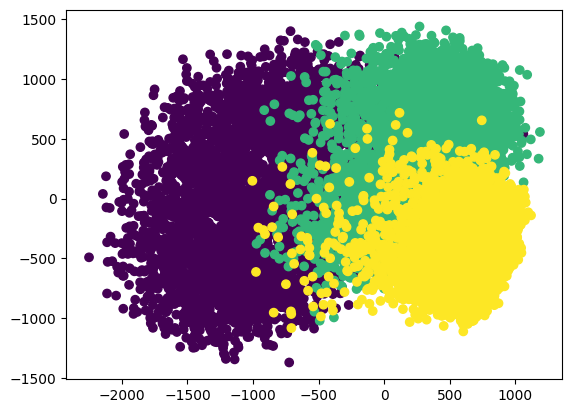

In [25]:
Z=Uk.T@Xc
print(Z.shape)
#plot
plt.scatter(Z[0,:], Z[1,:], c=Y) #c means color -> we color the data based on the label
plt.show()